In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data into a Pandas Dataframe
df = pd.read_csv('cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
# finding duplicating values

duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [id, age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio]
Index: []


In [5]:
# finding missing values

missing_values = df.isnull()
missing_counts = df.isnull().sum()
print("Missing Values:")
print(missing_values)
print("\nMissing Value Counts:")
print(missing_counts)


Missing Values:
          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol   gluc  \
0      False  False   False   False   False  False  False        False  False   
1      False  False   False   False   False  False  False        False  False   
2      False  False   False   False   False  False  False        False  False   
3      False  False   False   False   False  False  False        False  False   
4      False  False   False   False   False  False  False        False  False   
...      ...    ...     ...     ...     ...    ...    ...          ...    ...   
69995  False  False   False   False   False  False  False        False  False   
69996  False  False   False   False   False  False  False        False  False   
69997  False  False   False   False   False  False  False        False  False   
69998  False  False   False   False   False  False  False        False  False   
69999  False  False   False   False   False  False  False        False  False   

       smok

Independent Features:

Age (in days), Gender (1-Female, 2-Male), Height, Weight, Systolic BP, Diastolic BP,

Cholesterol - 1 normal, 2 above normal, 3 well above normal

Glucose - 1 normal, 2 above normal, 3 well above normal

Smoking, Alcohol intake, Physical activity

Dependent/Output Feature:

Cardiovascular Disease

In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


From an initial statistical overview of the dataset, we infer that some data features are binary or ordinal, whereas other features are continuous. Further, the minimum and maximum values for some features, notably for systolic and diastolic blood pressure (ap_hi and ap_lo), are unrealistic. This suggests the presence of outliers in the data.



In [7]:
df.drop('id',axis=1,inplace=True)

In [8]:
#converting the age values from days to years

df['age'] = round(df['age']//365.25)

In [9]:
df['gender'] = df['gender'] - 1

Female - 0, Male - 1

In [10]:
df


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,1,168,62.0,110,80,1,1,0,0,1,0
1,55.0,0,156,85.0,140,90,3,1,0,0,1,1
2,51.0,0,165,64.0,130,70,3,1,0,0,0,1
3,48.0,1,169,82.0,150,100,1,1,0,0,1,1
4,47.0,0,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.0,1,168,76.0,120,80,1,1,1,0,1,0
69996,61.0,0,158,126.0,140,90,2,2,0,0,1,1
69997,52.0,1,183,105.0,180,90,3,1,0,1,0,1
69998,61.0,0,163,72.0,135,80,1,2,0,0,0,1


In [11]:
#check distribution of target variable
df.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [12]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022762,-0.081373,0.053567,0.020932,0.017553,0.153998,0.098529,-0.047479,-0.029674,-0.009803,0.237949
gender,-0.022762,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081373,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053567,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020932,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017553,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.153998,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098529,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047479,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029674,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


This seems a roughly balanced dataset with 50.03% of people with No cardiovascular disease and 49.97% with cardiovascular disease.

<Axes: >

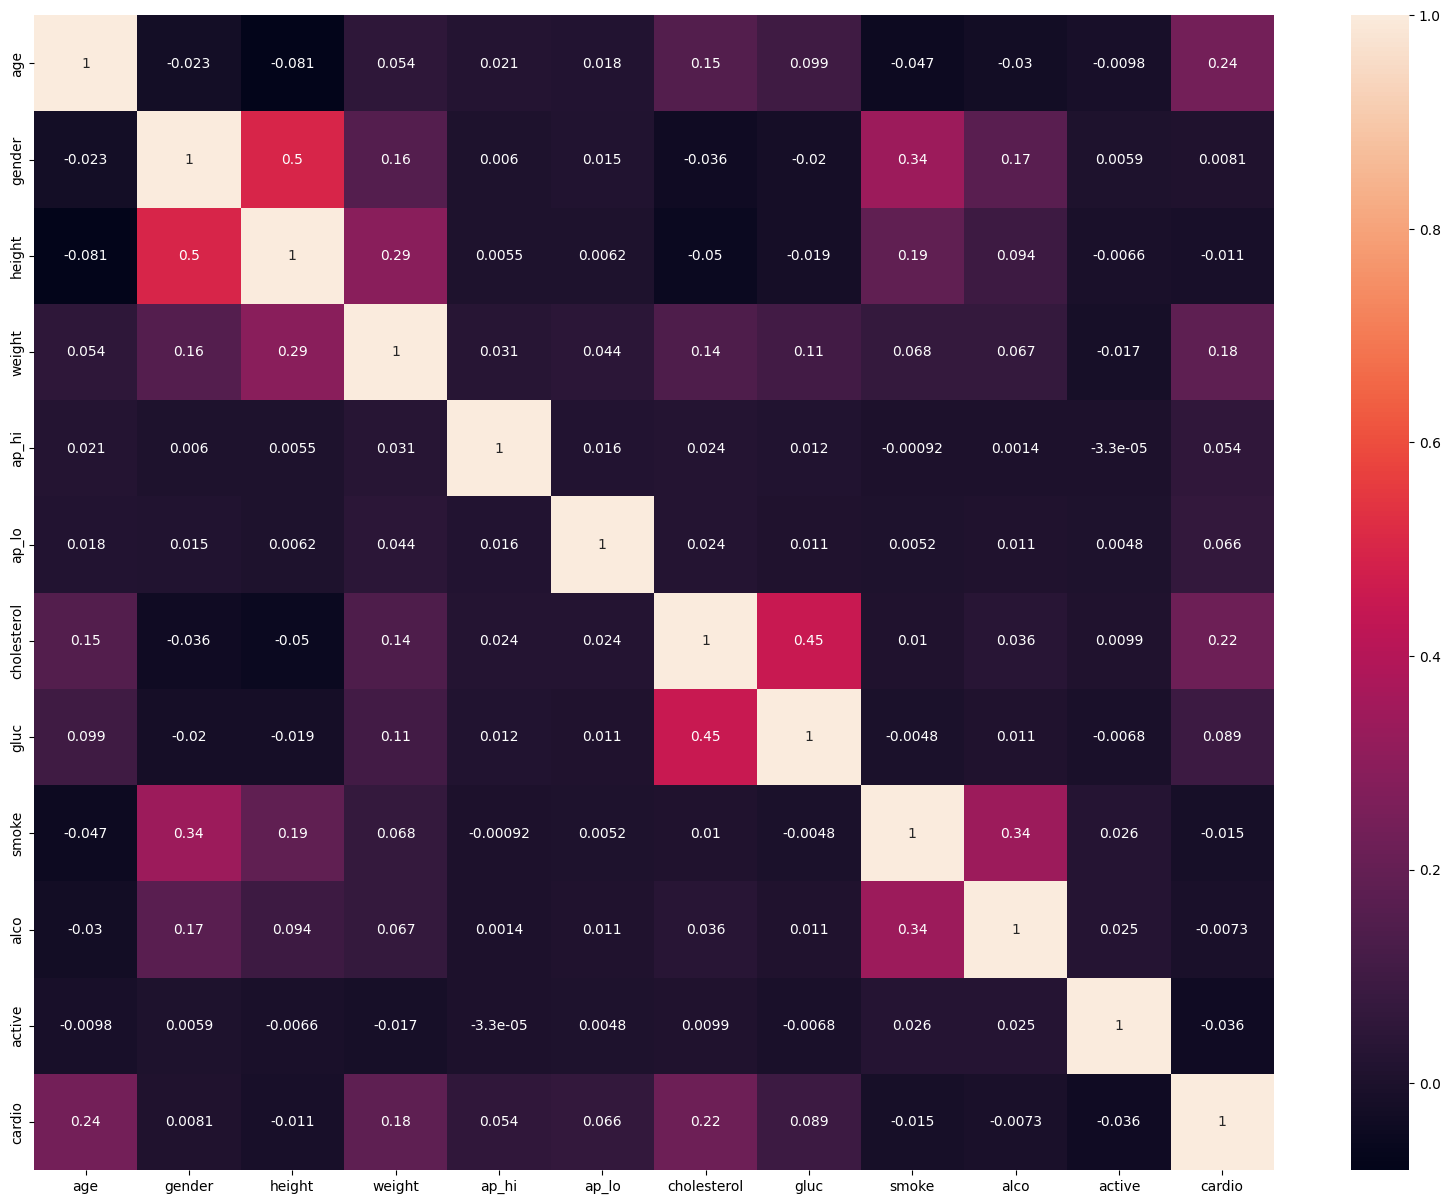

In [13]:
# check correlations
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

A heatmap shows correlations between variables in the dataset. From the above heatmap, we see that features that positivitely correlate with the target (cardio) are **age**, **weight**, and **cholestrol**. Also, correlations exist between a select few variables:



*   **Height** and **gender** are correlated with a score of 0.5.
*   **Glucose** and **cholesterol** are correlated with a score of 0.45.
*   **Smoking habits** and **gender** are correlated with a score of 0.34.






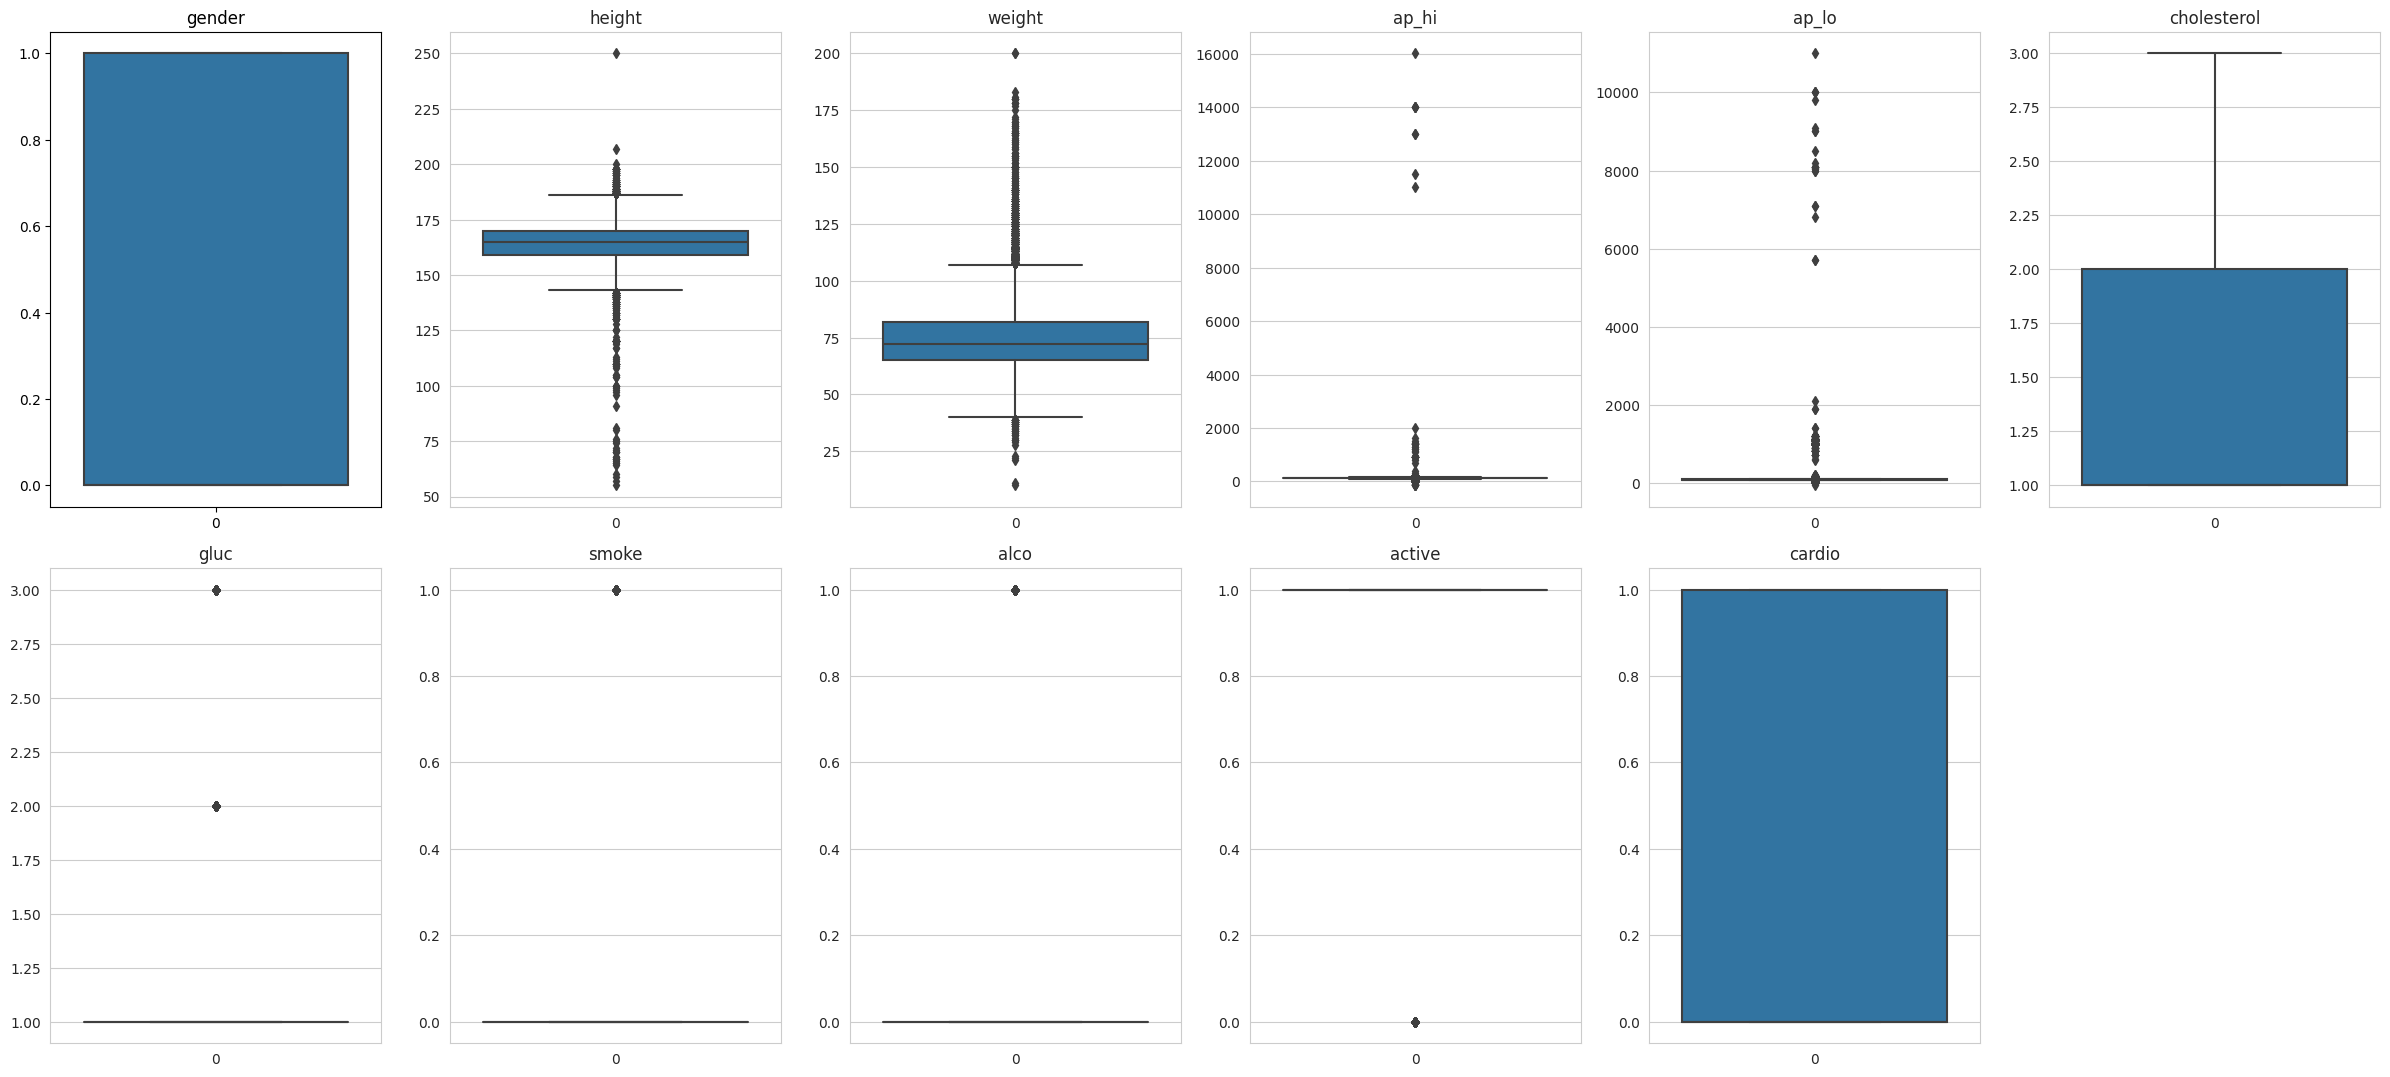

In [14]:
# check outliers
import math
def check_outliers(df):
    l = df.columns.values
    number_of_columns = math.ceil((len(l)-1)/2)
    number_of_rows = 2

    plt.figure(figsize=(4*number_of_columns, 8*number_of_rows))
    for i in range(1, len(l)):
        plt.subplot(number_of_rows + 1,number_of_columns,i)
        sns.set_style('whitegrid')
        sns.boxplot(df[l[i]], orient='v')
        plt.title(l[i])
    plt.tight_layout()

check_outliers(df)

The above boxplots confirm our suspicion that there are outliers in the dataset. There appear to be several outliers in the systolic and diastolic variables (ap_hi and ap_lo). These outliers might be explained by human error when entering data into the .csv format. This prediction model might benefit if these outliers were removed from the data.

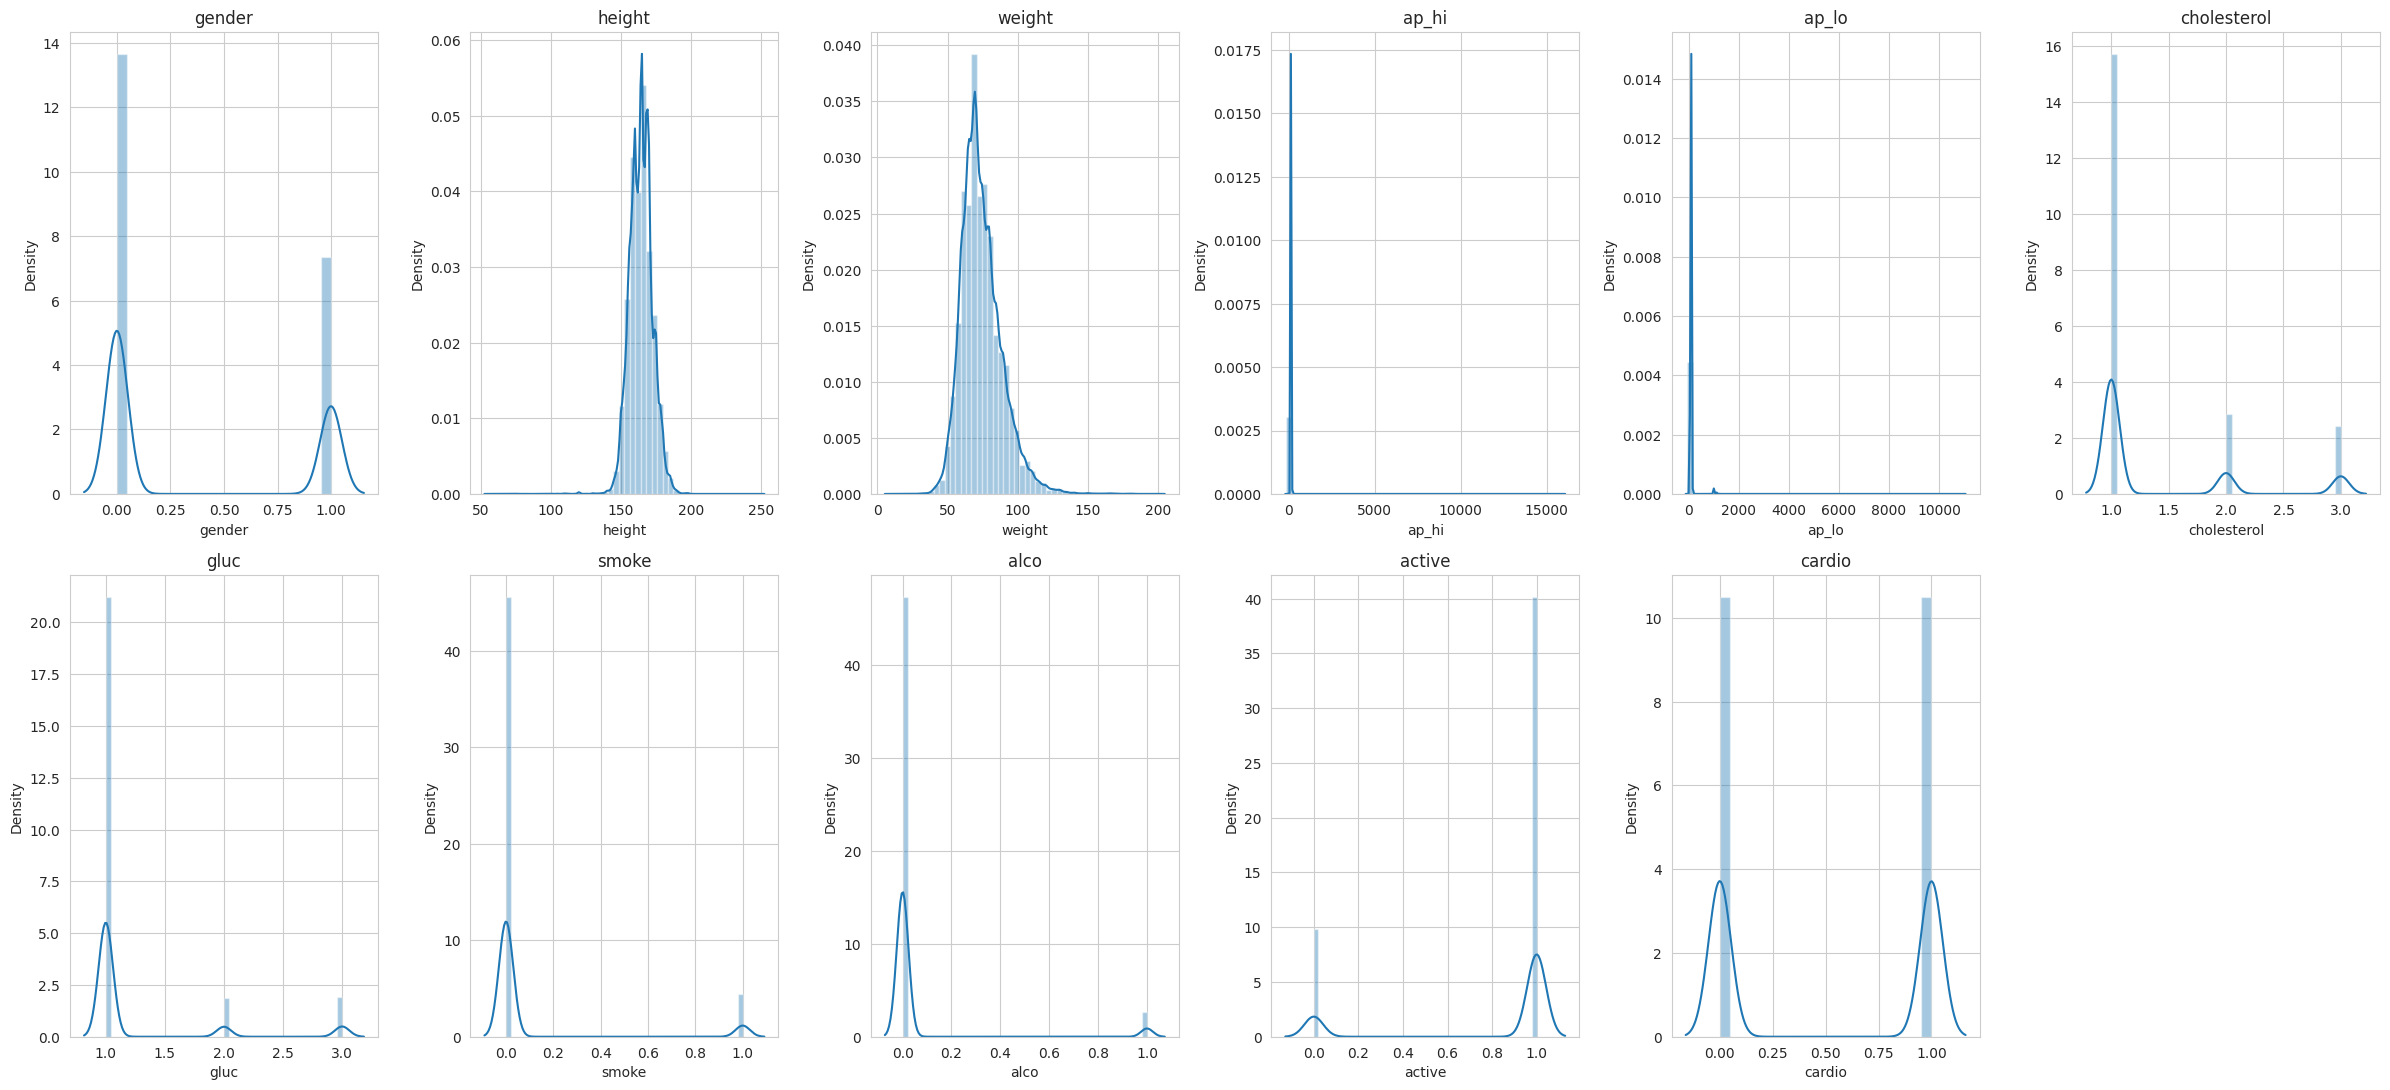

In [15]:
from pandas.core.algorithms import value_counts
# check distribution and skewness
def check_dist(df):
    l = df.columns.values
    number_of_columns = math.ceil((len(l)-1)/2)
    number_of_rows = 2

    plt.figure(figsize=(4*number_of_columns, 8*number_of_rows))
    for i in range(1, len(l)):
        plt.subplot(number_of_rows + 1,number_of_columns,i)
        sns.distplot(df[l[i]], kde=True)
        plt.title(l[i])
        plt.tight_layout()

check_dist(df)

Histograms show the distribution of each feature in the dataset. There appears to be some variation in age, but height and weight are roughly normally distributed. However, the histograms further suggest the presence of outliers in the blood pressure features. Moreover, there exist categorical features in the dataset, such as gender, cholesterol, glucose, smoking habits, alcohol use, and activity.

The skewness is observed in categorical variables like "Cholestrol", "Glucose" and "Alcohol" if the patients' have lifestyle concerns represented in binary outcomes 0 and 1. For further evaluation, I will use one-hot encoding later.


[Text(0, 0, '29.0'),
 Text(1, 0, '30.0'),
 Text(2, 0, '39.0'),
 Text(3, 0, '40.0'),
 Text(4, 0, '41.0'),
 Text(5, 0, '42.0'),
 Text(6, 0, '43.0'),
 Text(7, 0, '44.0'),
 Text(8, 0, '45.0'),
 Text(9, 0, '46.0'),
 Text(10, 0, '47.0'),
 Text(11, 0, '48.0'),
 Text(12, 0, '49.0'),
 Text(13, 0, '50.0'),
 Text(14, 0, '51.0'),
 Text(15, 0, '52.0'),
 Text(16, 0, '53.0'),
 Text(17, 0, '54.0'),
 Text(18, 0, '55.0'),
 Text(19, 0, '56.0'),
 Text(20, 0, '57.0'),
 Text(21, 0, '58.0'),
 Text(22, 0, '59.0'),
 Text(23, 0, '60.0'),
 Text(24, 0, '61.0'),
 Text(25, 0, '62.0'),
 Text(26, 0, '63.0'),
 Text(27, 0, '64.0')]

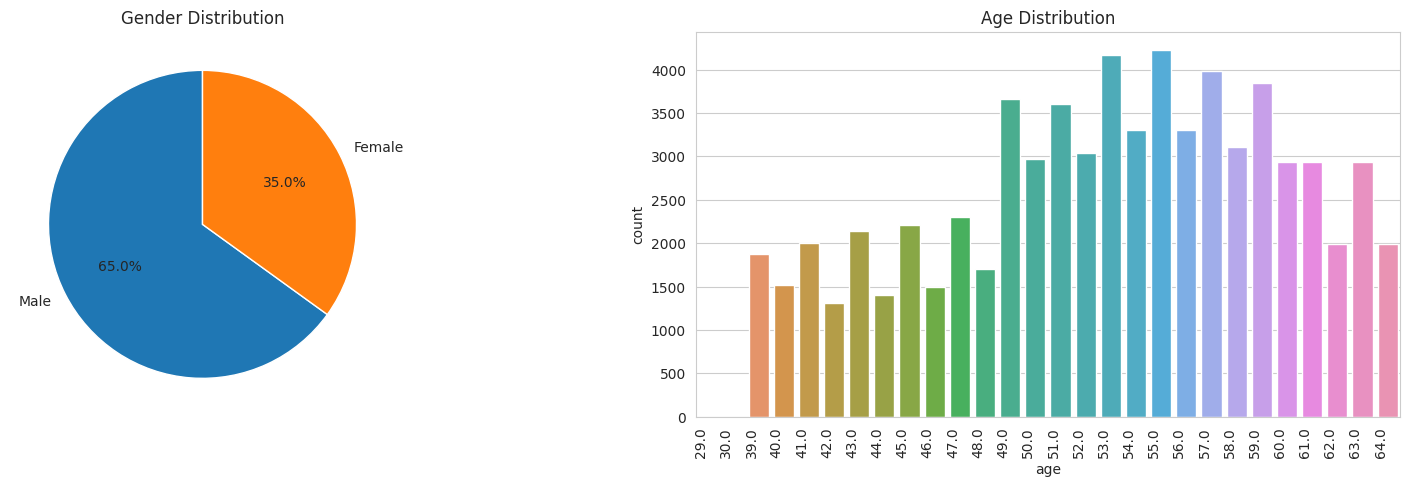

In [16]:
fig, ax = plt.subplots(1,2,figsize=(20, 5))
ax[0].pie(df['gender'].value_counts(), labels = ['Male', 'Female'], autopct='%1.1f%%', startangle=90)
ax[0].set_title('Gender Distribution')
sns.countplot(x = 'age', data = df, ax = ax[1]).set_title('Age Distribution')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')


<Axes: xlabel='cardio', ylabel='count'>

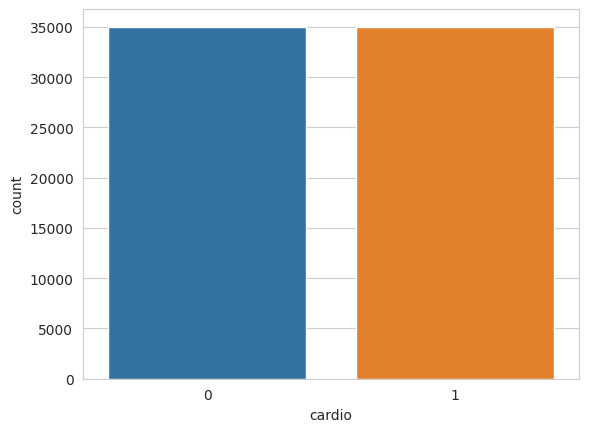

In [17]:
sns.countplot(x=df['cardio'])


This is a balanced dataset

<Axes: xlabel='gluc', ylabel='count'>

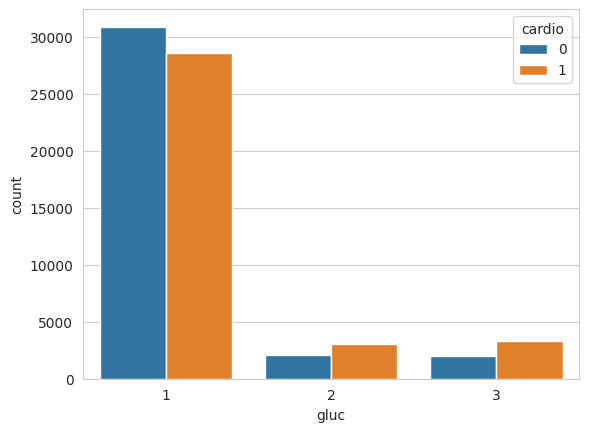

In [18]:
sns.countplot(x=df['gluc'],hue=df['cardio'])


<Axes: xlabel='cholesterol', ylabel='count'>

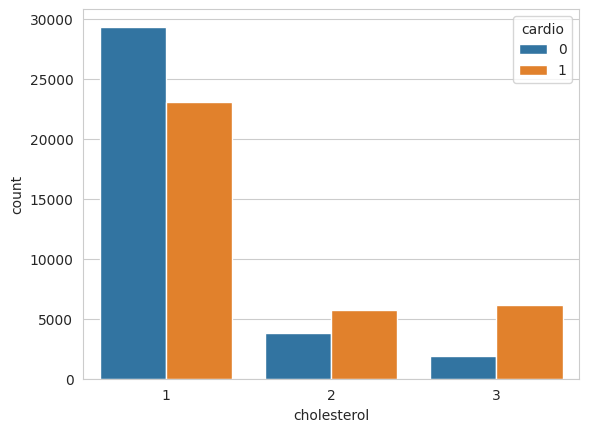

In [19]:
sns.countplot(x=df['cholesterol'],hue=df['cardio'])


<Axes: xlabel='active', ylabel='count'>

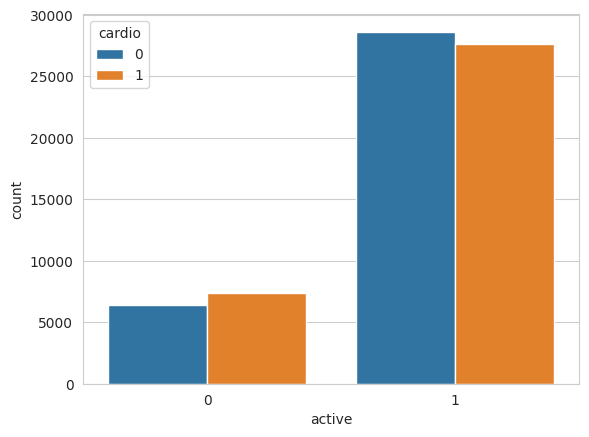

In [20]:
sns.countplot(x=df['active'],hue=df['cardio'])


<Axes: xlabel='gender', ylabel='count'>

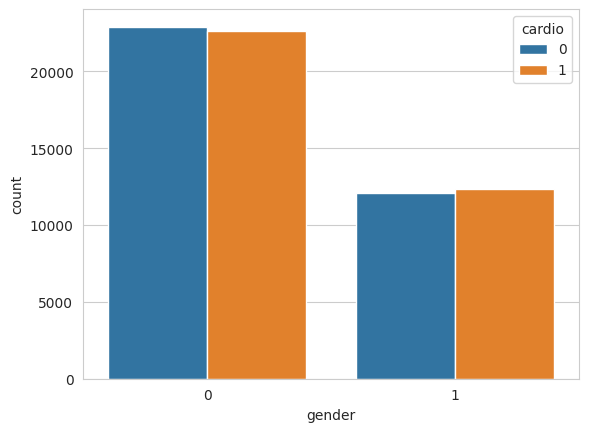

In [21]:
sns.countplot(x=df['gender'],hue=df['cardio'])


<Axes: xlabel='alco', ylabel='count'>

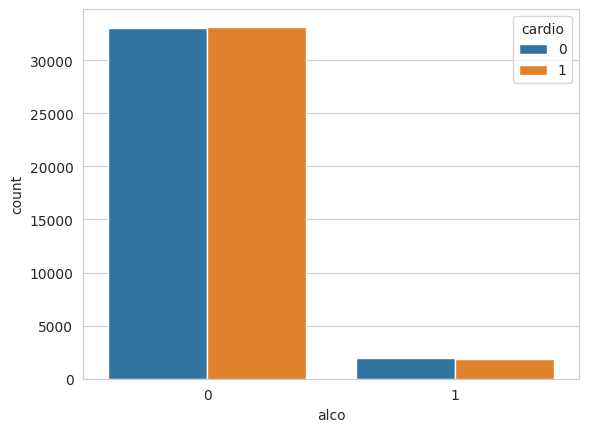

In [22]:
sns.countplot(x=df['alco'],hue=df['cardio'])


<Axes: xlabel='smoke', ylabel='count'>

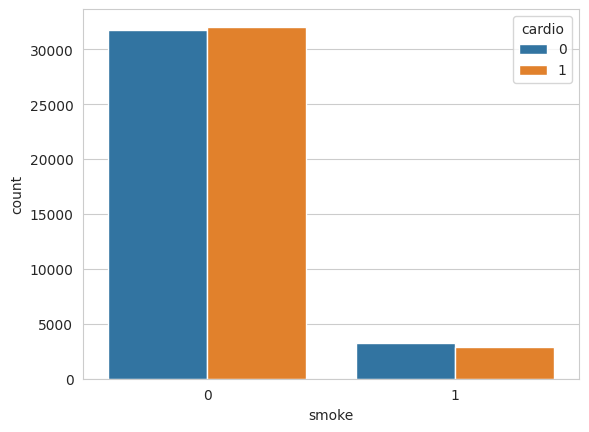

In [23]:
sns.countplot(x=df['smoke'],hue=df['cardio'])


In [24]:
df['cholesterol'] = df['cholesterol'].map({1:"chol_1",2:"chol_2",3:"chol_3"})

df['gluc'] = df['gluc'].map({1:"gluc_1",2:"gluc_2",3:"gluc_3"})

In [25]:
# remove outliers

def remove_outliers(arr):
    q1 = np.percentile(arr,25)
    q3 = np.percentile(arr,75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    for i in range(0,len(arr)):
        if arr[i] >= upper_bound or arr[i] <= lower_bound:
            arr[i] = np.nan

In [26]:
remove_outliers(df['ap_hi'])
remove_outliers(df['ap_lo'])
remove_outliers(df['height'])
remove_outliers(df['weight'])

In [27]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,1,168.0,62.0,110.0,80.0,chol_1,gluc_1,0,0,1,0
1,55.0,0,156.0,85.0,140.0,90.0,chol_3,gluc_1,0,0,1,1
2,51.0,0,165.0,64.0,130.0,70.0,chol_3,gluc_1,0,0,0,1
3,48.0,1,169.0,82.0,150.0,100.0,chol_1,gluc_1,0,0,1,1
4,47.0,0,156.0,56.0,100.0,NaN,chol_1,gluc_1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.0,1,168.0,76.0,120.0,80.0,chol_1,gluc_1,1,0,1,0
69996,61.0,0,158.0,NaN,140.0,90.0,chol_2,gluc_2,0,0,1,1
69997,52.0,1,183.0,105.0,NaN,90.0,chol_3,gluc_1,0,1,0,1
69998,61.0,0,163.0,72.0,135.0,80.0,chol_1,gluc_2,0,0,0,1


In [28]:
# dropping outliers
df = df.dropna()

In [29]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,1,168.0,62.0,110.0,80.0,chol_1,gluc_1,0,0,1,0
1,55.0,0,156.0,85.0,140.0,90.0,chol_3,gluc_1,0,0,1,1
2,51.0,0,165.0,64.0,130.0,70.0,chol_3,gluc_1,0,0,0,1
3,48.0,1,169.0,82.0,150.0,100.0,chol_1,gluc_1,0,0,1,1
5,59.0,0,151.0,67.0,120.0,80.0,chol_2,gluc_2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53.0,0,172.0,70.0,130.0,90.0,chol_1,gluc_1,0,0,1,1
69994,57.0,0,165.0,80.0,150.0,80.0,chol_1,gluc_1,0,0,1,1
69995,52.0,1,168.0,76.0,120.0,80.0,chol_1,gluc_1,1,0,1,0
69998,61.0,0,163.0,72.0,135.0,80.0,chol_1,gluc_2,0,0,0,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61774 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          61774 non-null  float64
 1   gender       61774 non-null  int64  
 2   height       61774 non-null  float64
 3   weight       61774 non-null  float64
 4   ap_hi        61774 non-null  float64
 5   ap_lo        61774 non-null  float64
 6   cholesterol  61774 non-null  object 
 7   gluc         61774 non-null  object 
 8   smoke        61774 non-null  int64  
 9   alco         61774 non-null  int64  
 10  active       61774 non-null  int64  
 11  cardio       61774 non-null  int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 6.1+ MB


In [31]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
count,61774.000000,61774.000000,61774.000000,61774.000000,61774.000000,61774.000000,61774.000000,61774.000000,61774.000000,61774.000000
mean,52.861981,0.348836,164.421634,73.158325,126.181727,81.650921,0.086428,0.052012,0.804319,0.491841
std,6.736562,0.476606,7.526350,12.247123,13.692507,7.566292,0.280997,0.222053,0.396727,0.499937
min,29.000000,0.000000,143.000000,40.000000,95.000000,66.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,0.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,1.000000,170.000000,81.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,1.000000,186.000000,107.000000,169.000000,104.000000,1.000000,1.000000,1.000000,1.000000


### **One Hot Encoding**

In [32]:
Chol = pd.get_dummies(df['cholesterol'])
Gluc = pd.get_dummies(df['gluc'])

df = pd.concat([df,Chol,Gluc],axis=1)

In [33]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,chol_1,chol_2,chol_3,gluc_1,gluc_2,gluc_3
0,50.0,1,168.0,62.0,110.0,80.0,chol_1,gluc_1,0,0,1,0,1,0,0,1,0,0
1,55.0,0,156.0,85.0,140.0,90.0,chol_3,gluc_1,0,0,1,1,0,0,1,1,0,0
2,51.0,0,165.0,64.0,130.0,70.0,chol_3,gluc_1,0,0,0,1,0,0,1,1,0,0
3,48.0,1,169.0,82.0,150.0,100.0,chol_1,gluc_1,0,0,1,1,1,0,0,1,0,0
5,59.0,0,151.0,67.0,120.0,80.0,chol_2,gluc_2,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53.0,0,172.0,70.0,130.0,90.0,chol_1,gluc_1,0,0,1,1,1,0,0,1,0,0
69994,57.0,0,165.0,80.0,150.0,80.0,chol_1,gluc_1,0,0,1,1,1,0,0,1,0,0
69995,52.0,1,168.0,76.0,120.0,80.0,chol_1,gluc_1,1,0,1,0,1,0,0,1,0,0
69998,61.0,0,163.0,72.0,135.0,80.0,chol_1,gluc_2,0,0,0,1,1,0,0,0,1,0


The dataset was preprocessed to remove outliers in the ap_hi and ap_lo blood pressure features. Through this process, almost 9000 datapoints were discarded, but the resultant distributions depicted in the above bar plots and histograms for ap_hi and ap_lo are roughly normal.

The dataset has a mix of continuous, ordinal, and binary data as confirmed by above analysis. By combining all of these data types in one model to develop insights. Here are a few typical steps we took to preprocess this data before modeling.


*   Standardize all continuous features: All continuous input should be standardized. For every continuous feature, compute its mean (𝜇) and standard deviation (𝜎) and calculate 𝑥 = (𝑥−𝜇) / 𝜎.

*   Binarize categorical/discrete features (create dummy variables): For all categorical features, represent them as multiple boolean features. For example, instead of having one feature called cholesterol, have 3 boolean features - chol_normal, chol_above_normal, chol_well_above_normal and appropriately set these features to 0 or 1. As can be seen, for every categorical feature, k binary features are added, where k is the number of values that the categorical feature takes.



In [34]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,chol_1,chol_2,chol_3,gluc_1,gluc_2,gluc_3
age,1.000000,-0.032384,-0.095136,0.054864,0.201860,0.144018,-0.048310,-0.028727,-0.011020,0.234675,-0.128985,0.021939,0.151699,-0.085565,0.023754,0.091313
gender,-0.032384,1.000000,0.516486,0.157767,0.038874,0.044120,0.336949,0.168135,0.007254,-0.006025,0.042535,-0.020607,-0.035764,0.022462,-0.005981,-0.024218
height,-0.095136,0.516486,1.000000,0.305845,-0.013329,0.004426,0.191682,0.093786,-0.009240,-0.028703,0.066785,-0.031868,-0.056673,0.030239,-0.019949,-0.021099
weight,0.054864,0.157767,0.305845,1.000000,0.229290,0.209763,0.064031,0.063671,-0.013099,0.159480,-0.122017,0.063008,0.098440,-0.098162,0.080550,0.053224
ap_hi,0.201860,0.038874,-0.013329,0.229290,1.000000,0.704027,0.020540,0.026020,0.003349,0.430715,-0.188817,0.099719,0.149970,-0.091604,0.067016,0.057551
ap_lo,0.144018,0.044120,0.004426,0.209763,0.704027,1.000000,0.019079,0.030530,0.000520,0.331652,-0.151091,0.078563,0.121320,-0.071970,0.057301,0.040721
smoke,-0.048310,0.336949,0.191682,0.064031,0.020540,0.019079,1.000000,0.342285,0.026972,-0.022579,-0.013180,0.023104,-0.006748,0.003430,0.012692,-0.016853
alco,-0.028727,0.168135,0.093786,0.063671,0.026020,0.030530,0.342285,1.000000,0.026411,-0.013166,-0.037952,0.038293,0.010681,-0.012886,0.025635,-0.007575
active,-0.011020,0.007254,-0.009240,-0.013099,0.003349,0.000520,0.026972,0.026411,1.000000,-0.037841,-0.005487,-0.006061,0.013913,0.009234,-0.011020,-0.001679
cardio,0.234675,-0.006025,-0.028703,0.159480,0.430715,0.331652,-0.022579,-0.013166,-0.037841,1.000000,-0.201848,0.077895,0.190935,-0.086230,0.047287,0.069449


<Axes: >

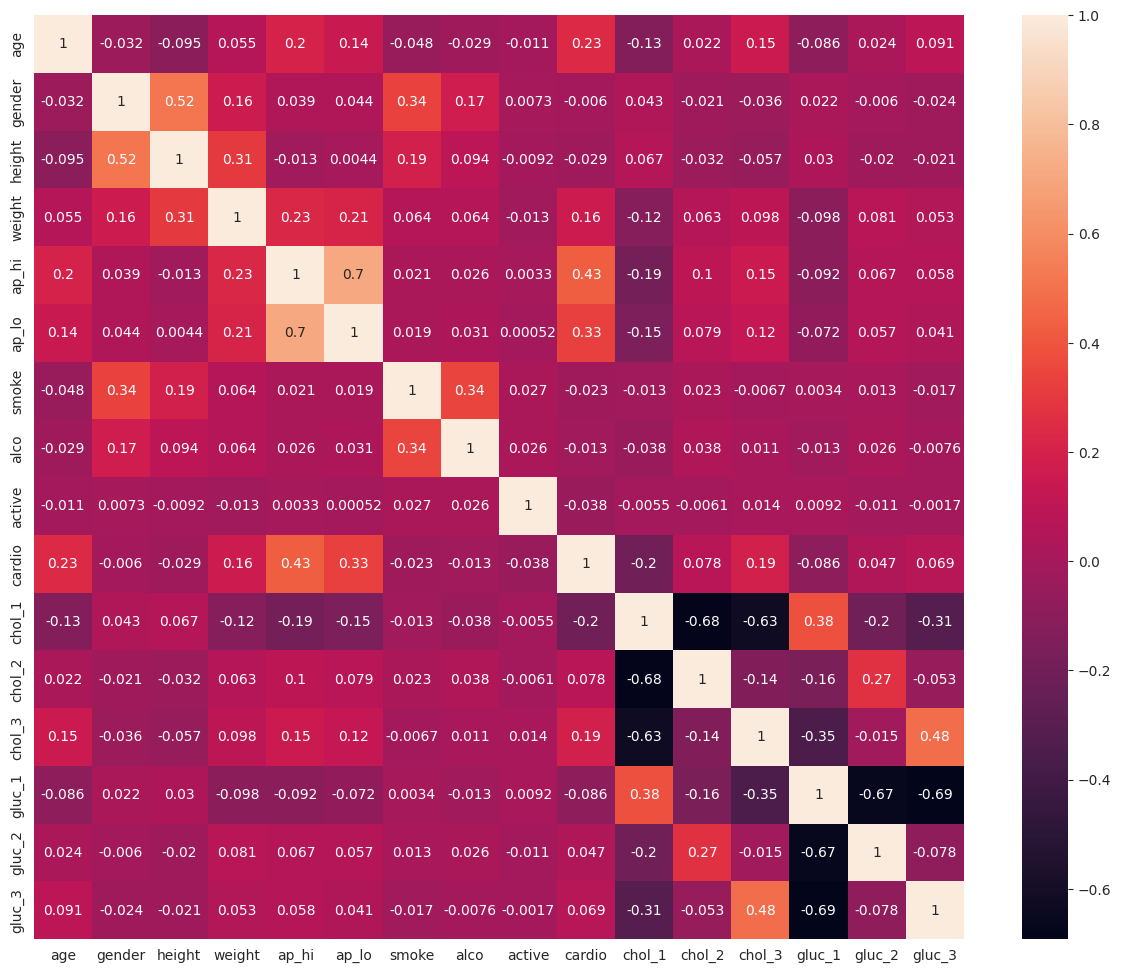

In [35]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

After the preprocessing, we can clearly see which feature contributes directly and indirectly to the output variable.

**Age**, **weight** and **level 3 cholesterol** contribute **positively** to the output.

**Systolic BP** and **Diastolic BP** contribute **very positively** to the output.

**Level 1 cholesterol** contribute **negatively** to the output.
Rest of the features do not have much effect on the output.

We can also note that each **level of cholestrol is highly correlated** to the corresponding **same level of glucose**.
 This means that if a person has level 3 cholestrol, the chance of him/her having level 3 glucose is high.
 A similar case can be seen in **systolic and diastolic BP** which have a very **high value** of **correlation**.

**Weight** is also correlated to **systolic and diastolic BP**. Thus, if a person's weight increases his/her BP will also increase.


In [36]:
df.drop(['cholesterol','gluc','chol_1','gluc_1'],axis=1,inplace=True)


In [37]:
df

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,chol_2,chol_3,gluc_2,gluc_3
0,50.0,1,168.0,62.0,110.0,80.0,0,0,1,0,0,0,0,0
1,55.0,0,156.0,85.0,140.0,90.0,0,0,1,1,0,1,0,0
2,51.0,0,165.0,64.0,130.0,70.0,0,0,0,1,0,1,0,0
3,48.0,1,169.0,82.0,150.0,100.0,0,0,1,1,0,0,0,0
5,59.0,0,151.0,67.0,120.0,80.0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53.0,0,172.0,70.0,130.0,90.0,0,0,1,1,0,0,0,0
69994,57.0,0,165.0,80.0,150.0,80.0,0,0,1,1,0,0,0,0
69995,52.0,1,168.0,76.0,120.0,80.0,1,0,1,0,0,0,0,0
69998,61.0,0,163.0,72.0,135.0,80.0,0,0,0,1,0,0,1,0


In [38]:
X = df.drop(['cardio'],axis=1)
y = df['cardio']

In [39]:
X.shape

(61774, 13)

In [40]:
y.shape

(61774,)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [42]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# **MODEL TRAINING AND TESTING**

---
We are going to train and test our data on 5 model and compare the results:



*   Logistic Regression Classifier
*   Decision Tree
*   Random Forest Classifier
*   XGBoost
*   K Nearest Neighbors













In [43]:
!pip uninstall scikit-learn # until no more scikit-learn is present
!pip install scikit-learn
from sklearn.metrics import confusion_matrix, RocCurveDisplay, classification_report, accuracy_score
#from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.3.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/uninstall.py", line 105, in run
    uninstall_pathset = req.uninstall(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_install.py", line 680, in uninstall
    uninstalled_pathset.remove(auto_confirm, verbose)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_uninstall.py", line 375, in remove
    if auto_confirm or self._allowed_to_proceed(verbose):
  File "/usr/local/lib/py

Logistic Regression Classifier



In [44]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train,y_train)

LogisticRegression()

In [45]:
y_pred = classifier_lr.predict(X_test)


In [46]:
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = accuracy * 100

Accuracy: 72.30%


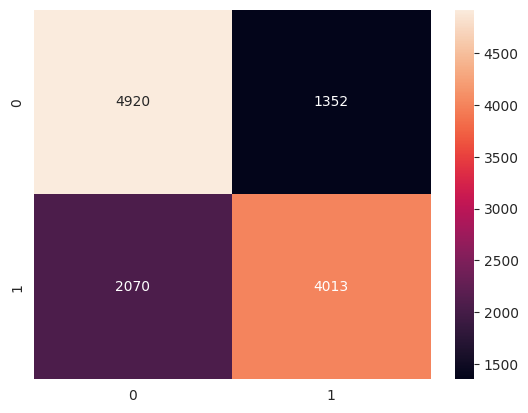

In [47]:
sns.heatmap(cm,annot=True,fmt='0g')
print(f'Accuracy: {accuracy_percent:.2f}%')

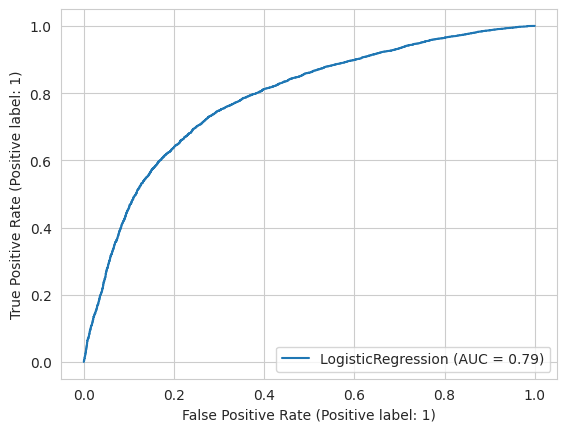

In [48]:
lrc_disp = RocCurveDisplay.from_estimator(classifier_lr, X_test, y_test)

In [49]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6272
           1       0.75      0.66      0.70      6083

    accuracy                           0.72     12355
   macro avg       0.73      0.72      0.72     12355
weighted avg       0.73      0.72      0.72     12355



In [50]:
from sklearn import tree
classifier_dt = tree.DecisionTreeClassifier()
classifier_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred = classifier_dt.predict(X_test)


In [52]:
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = accuracy * 100

Accuracy: 62.34%


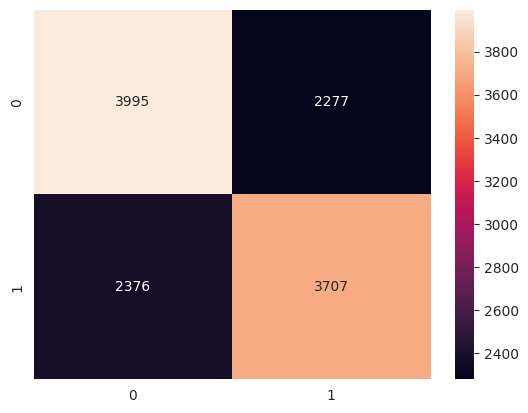

In [53]:
sns.heatmap(cm,annot=True,fmt='0g')
print(f'Accuracy: {accuracy_percent:.2f}%')

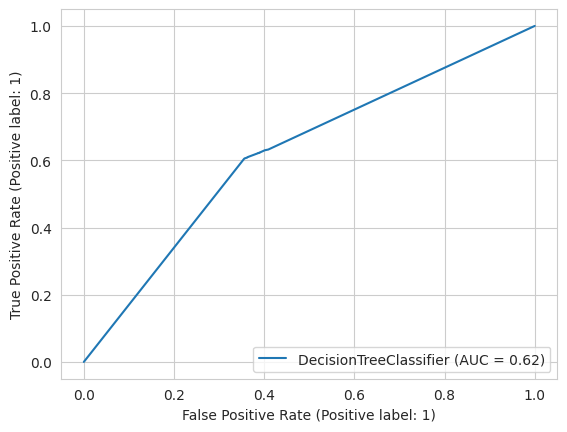

In [54]:
dtc_disp = RocCurveDisplay.from_estimator(classifier_dt, X_test, y_test)

In [55]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.63      0.64      0.63      6272
           1       0.62      0.61      0.61      6083

    accuracy                           0.62     12355
   macro avg       0.62      0.62      0.62     12355
weighted avg       0.62      0.62      0.62     12355



Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
y_pred = classifier_rf.predict(X_test)


In [58]:
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = accuracy * 100

Accuracy: 69.56%


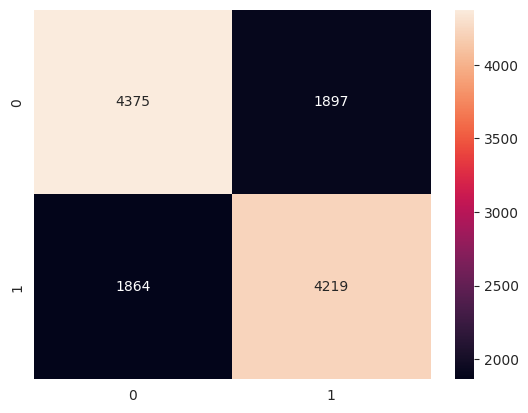

In [59]:
sns.heatmap(cm,annot=True,fmt='0g')
print(f'Accuracy: {accuracy_percent:.2f}%')

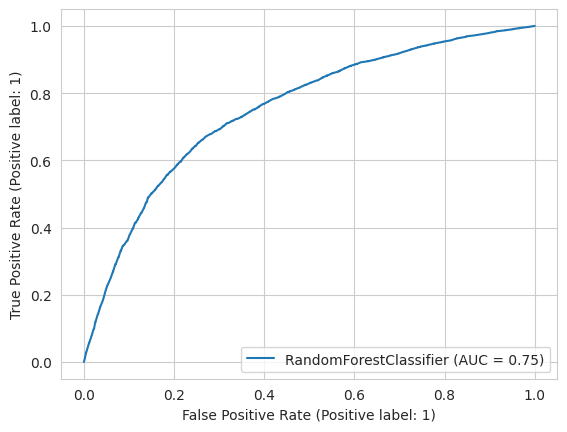

In [60]:
rfc_disp = RocCurveDisplay.from_estimator(classifier_rf, X_test, y_test)

In [61]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.70      0.70      6272
           1       0.69      0.69      0.69      6083

    accuracy                           0.70     12355
   macro avg       0.70      0.70      0.70     12355
weighted avg       0.70      0.70      0.70     12355



Gradient Boosting Algorithm

In [62]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
y_pred = classifier_xgb.predict(X_test)


Accuracy: 72.72%


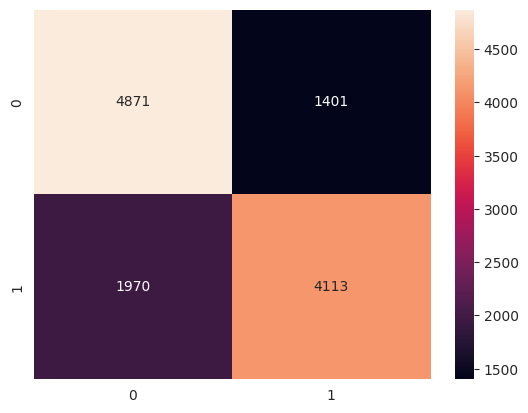

In [64]:
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = accuracy * 100
sns.heatmap(cm,annot=True,fmt='0g')
print(f'Accuracy: {accuracy_percent:.2f}%')

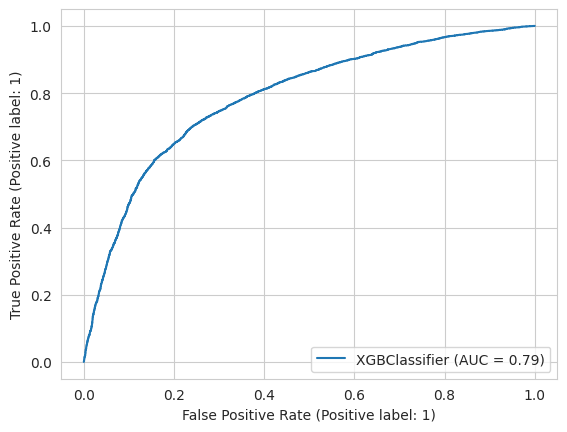

In [65]:
xgb_disp = RocCurveDisplay.from_estimator(classifier_xgb, X_test, y_test)

In [66]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6272
           1       0.75      0.68      0.71      6083

    accuracy                           0.73     12355
   macro avg       0.73      0.73      0.73     12355
weighted avg       0.73      0.73      0.73     12355



KNN Classifier

In [67]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [68]:
y_pred = classifier_knn.predict(X_test)


Accuracy: 68.85%


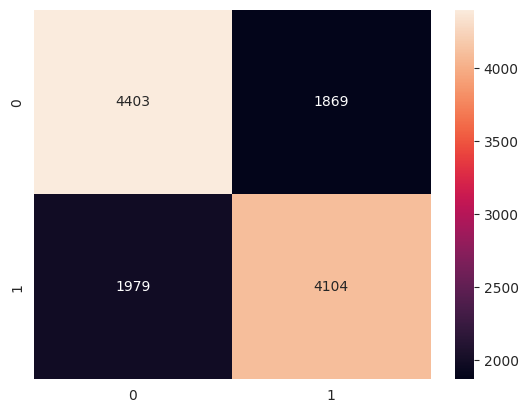

In [69]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='0g')
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = accuracy * 100
print(f'Accuracy: {accuracy_percent:.2f}%')

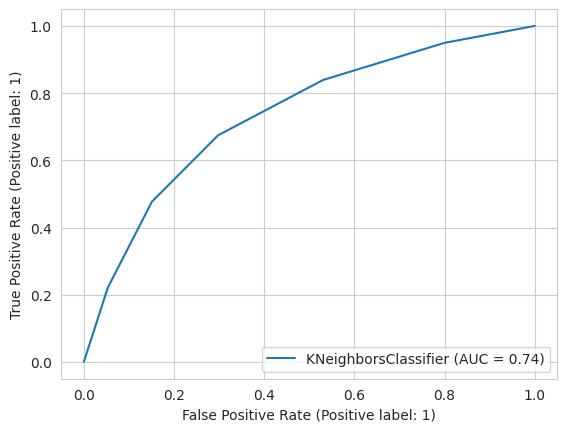

In [70]:
knn_disp = RocCurveDisplay.from_estimator(classifier_knn, X_test, y_test)

In [71]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.70      0.70      6272
           1       0.69      0.67      0.68      6083

    accuracy                           0.69     12355
   macro avg       0.69      0.69      0.69     12355
weighted avg       0.69      0.69      0.69     12355



### **Conclusion**

**Logistic Regression** gives an Accuracy of 72.30% and recall(class 1) as 0.66

**Decision Tree** gives an Accuracy of 62.34% and recall(class 1) as 0.61

**Random Forest** gives an Accuracy of 69.53% and recall(class 1) as 0.69

**Gradient Boosting/XG Boost** gives an Accuracy of 72.72% and recall(class 1) as 0.68

**kNN model** gives an Accuracy of 68.85% and recall(class 1) as 0.67


In medical classification, our main aim should be to **reduce the number of false negative** (class 1 recall should be high) because we do not want our model to predict a person who is having the disease (class 1) as not having the disease (class 0).

The **XGBoost model** outperforms all the other models in terms of **accuracy** as well as **class 1 recall**. Thus, we will use XGBoost model for deployment.

